<a href="https://colab.research.google.com/github/Hab-eeb/08-weather-conditions/blob/master/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/My Drive/household_power_consumption.txt", sep=";", parse_dates=[["Date","Time"]])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_e = df

## **For some reason i wasnt able to resample everytime i resampled it reduced the data to just one column thats why i had issues completing the quiz**

In [ ]:
df.head(20)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
2006-12-16 17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
2006-12-16 17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
2006-12-16 17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
2006-12-16 17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0


In [ ]:
df.set_index("Date_Time",inplace=True)

In [ ]:
df = df.replace("?",np.nan)

In [ ]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [ ]:
df.fillna(df.mean())

In [ ]:
df_daily =df.resample('d').sum()

In [ ]:
df_daily

,Sub_metering_3
Date_Time,
2006-12-16,4926.0
2006-12-17,13341.0
2006-12-18,14018.0
2006-12-19,6197.0
2006-12-20,14063.0
...,...
2010-12-07,6444.0
2010-12-08,3982.0
2010-12-09,8891.0


In [ ]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
df['Sub_metering_3']=df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean())

In [ ]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [ ]:
 df_dail = df.drop(["Global_reactive_power",	"Voltage",	"Global_intensity",	"Sub_metering_1",	"Sub_metering_2","Sub_metering_3"],axis=1)

In [ ]:
df_dail.isnull().sum()

Global_active_power    0
dtype: int64

In [ ]:
df_daily = df_dail.resample("D").sum()

In [ ]:
df_daily.shape

(1457, 1)

In [ ]:
df_daily.isnull().sum()

Sub_metering_3    0
dtype: int64

In [ ]:
#df['Global_active_power']=df['Global_active_power'].fillna(df['Global_active_power'].mean())

In [ ]:
df_daily['Global_active_power']=df_daily['Global_active_power'].fillna(method="ffill")

In [ ]:
df_daily.isnull().sum()

Global_active_power    0
dtype: int64

TypeError: ignored

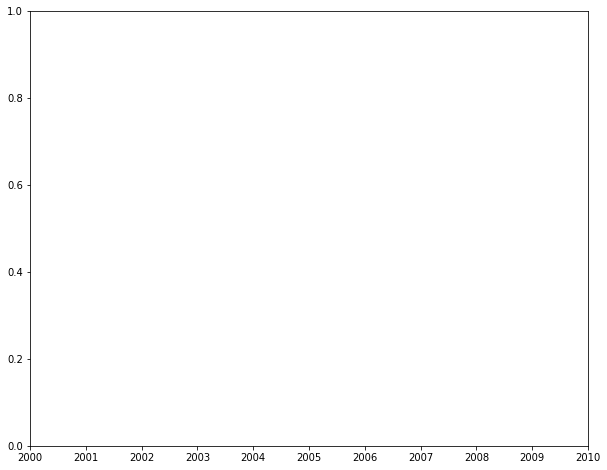

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_daily.index,df_daily["Global_active_power"])

In [ ]:
 df_dail2 = df.drop(["Voltage",	"Global_intensity",	"Sub_metering_1",	"Sub_metering_2","Sub_metering_3"],axis=1)

In [ ]:
df_daily2=df_dail2.resample("D").sum()

In [ ]:
r1 = np.corrcoef(df_daily2["Global_active_power"], df_daily2["Global_reactive_power"])

TypeError: ignored

In [ ]:
 df_dail3 = df.drop(["Global_reactive_power","Global_active_power"	,"Sub_metering_1",	"Sub_metering_2","Sub_metering_3"],axis=1)

In [ ]:
df_daily3=df_dail3.resample("D").sum()

In [ ]:
r2 = np.corrcoef(df_daily3["Voltage"], df_daily3["Global_intensity"])

In [ ]:
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
df.isnull().sum()

Date_Time                    0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
25979/df.shape[0] * 100

1.2518437457686005

In [ ]:
df = df.replace("?",np.nan)

In [ ]:
df = df.interpolate(method="linear",limit_direction="forward")
df = df.fillna(method="bfill")

In [ ]:
df.isnull().sum()

Date_Time                0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df = df.astype({"Global_active_power":"float64","Global_reactive_power":"float64",	"Voltage":"float64",	"Global_intensity":"float64",	"Sub_metering_1":"float64",	"Sub_metering_2":"float64","Sub_metering_3":"float64"})

In [ ]:
#df["Rem_metering"] = df["Global_active_power"]*1000/60-df["Sub_metering_1"]-df["Sub_metering_2"]-df["Sub_metering_3"]

In [ ]:
#df = df.astype({"Global_active_power":"int64","Global_reactive_power":"int64",	"Voltage":"int64",	"Global_intensity":"int64",	"Sub_metering_1":"int64",	"Sub_metering_2":"int64","Rem_metering":"int64","Sub_metering_3":"int64"})